# Capstone: supervised learning

__First__: Go out and find a dataset of interest. It could be from one of our recommended resources, some other aggregation, or scraped yourself. Just make sure it has lots of variables in it, including an outcome of interest to you.

__Second__: Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

__Third__: Model your outcome of interest. You should try several different approaches and really work to tune a variety of models before using the model evaluation techniques to choose what you consider to be the best performer. Make sure to think about explanatory versus predictive power and experiment with both.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Exploration & Feature Selection

In [2]:
# I'll use the wine quality dataset from UC Irvaine data repository
df = pd.read_csv("winequality-red.csv", delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Let's check weather there are missing values.

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no missing value in this dataset. Next, we will check the distributions of the features.

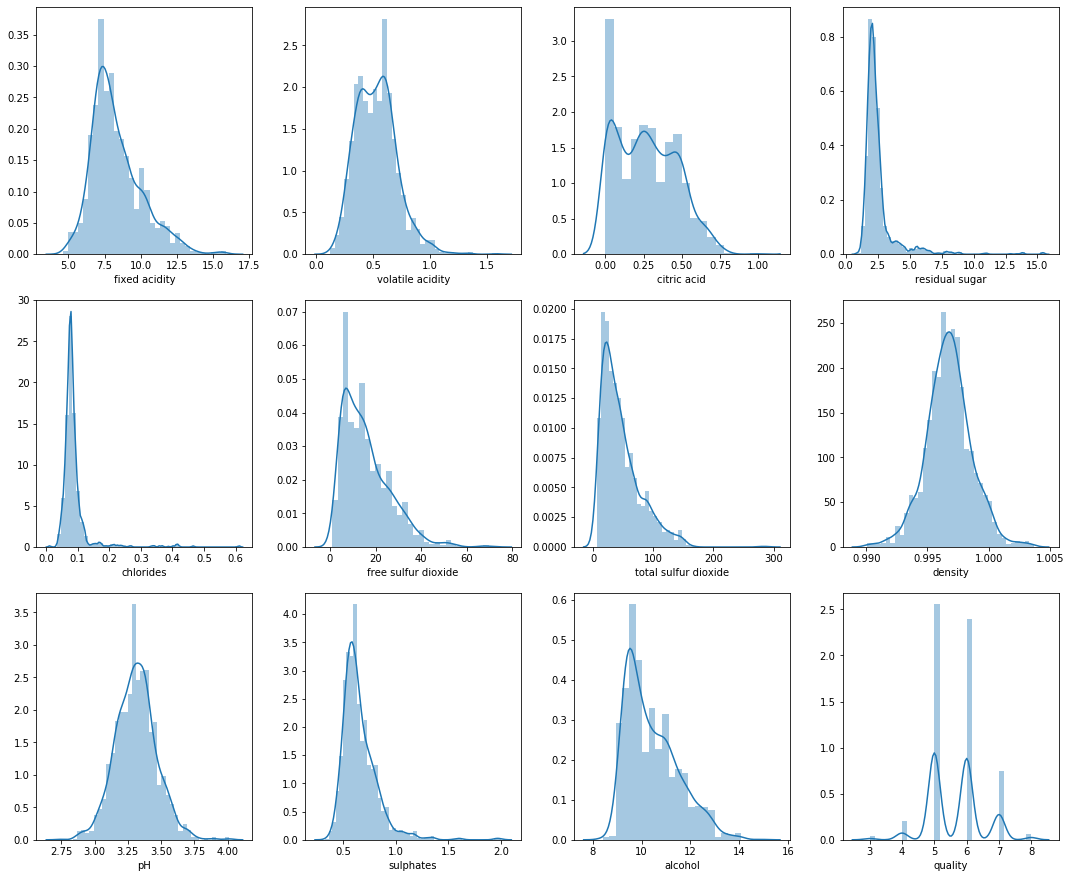

In [6]:
plt.figure(figsize=(15,20))

i =1
for column in df.columns:
    plt.subplot(5, 4, i)
    sns.distplot(df[column])
    i+=1
    
plt.tight_layout()
plt.show()

Only density and pH are close to normal distributions. Also, there are sharp discontinutities in quality. We don't have continuous data. No wine has a 3.5 rating, for example. We will turn quality which is our target variable into classification. We'll set ratings 7+ as "good".

In [7]:
#set ratings 5+ as "good"
good = df[df["quality"] >= 7]

#create new column "target", set values to 1
good["target"] = 1

#check it out
good.head()

/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7,1
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7,7,1
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.9968,3.38,0.62,9.5,7,1


In [8]:
#set ratings 5+ as "good"
non_good = df[df["quality"] < 7]

#create new column "target", set values to 1
non_good["target"] =0

#check it out
non_good.head()

/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Let's merge good and non good.

In [9]:
#Specify frames
frames = [good, non_good]

#Concatenate frames
merge = pd.concat(frames)

df2 = merge

#confirm changes
df2.head(1599)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,1
16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7,1
37,8.1,0.380,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.7,7,1
62,7.5,0.520,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.5,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [10]:
#Check data types. All columns are numeric so no changes needed.
df2.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
target                    int64
dtype: object

In [11]:
print("Good wines: ", (df2["target"] == 1).sum())
print("Non good wines: ", (df2["target"] == 0).sum())

df3= df2.drop(["quality"],1)
df3.describe()

Good wines:  217
Non good wines:  1382


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


Now, let's take a look at how the features vary by target group. Also, use a t-test to compare means between target groups.

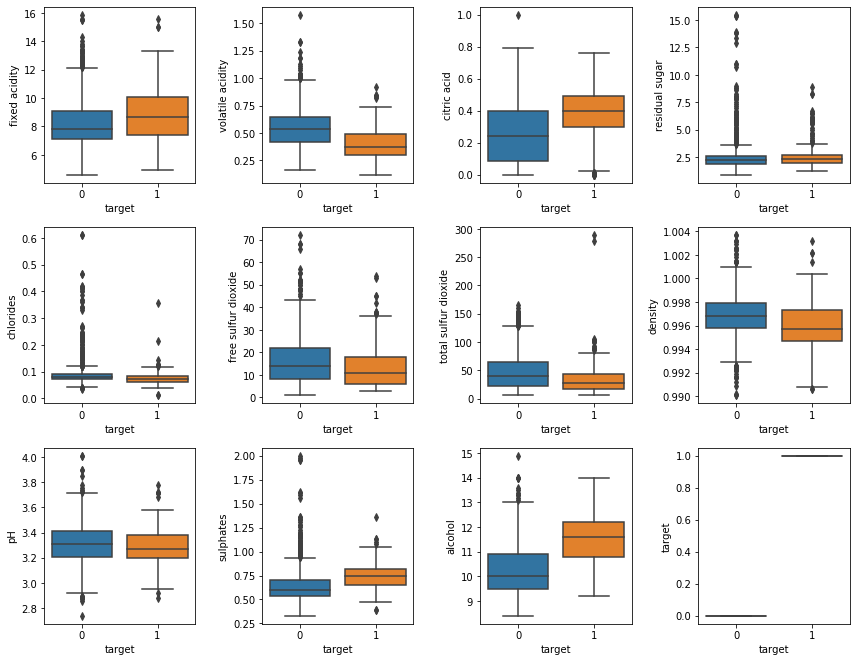

fixed acidity
Ttest_indResult(statistic=-4.8328960963052, pvalue=1.4748688383383466e-06) 

volatile acidity
Ttest_indResult(statistic=11.237923111478523, pvalue=2.9578633809350365e-28) 

citric acid
Ttest_indResult(statistic=-8.785474791138187, pvalue=3.9347797379848406e-18) 

residual sugar
Ttest_indResult(statistic=-1.9115483882007416, pvalue=0.056112960300893584) 

chlorides
Ttest_indResult(statistic=3.907196963164431, pvalue=9.727196360395434e-05) 

free sulfur dioxide
Ttest_indResult(statistic=2.874608388443506, pvalue=0.004098866497405742) 

total sulfur dioxide
Ttest_indResult(statistic=5.630495586992331, pvalue=2.119250973815227e-08) 

density
Ttest_indResult(statistic=6.081978709824803, pvalue=1.482554208847741e-09) 

pH
Ttest_indResult(statistic=2.292949742323404, pvalue=0.02198034398691512) 

sulphates
Ttest_indResult(statistic=-8.13543965838325, pvalue=8.162918771636208e-16) 

alcohol
Ttest_indResult(statistic=-17.822763607394528, pvalue=6.016774226316707e-65) 

target
Ttes

In [12]:
plt.figure(figsize=(12,15))

i=1
for column in df3.columns:
    plt.subplot(5,4,i)
    sns.boxplot(x=df3["target"], y=df3[column],orient="v")
    i+=1
    
plt.tight_layout()
plt.show()

#Test for significance between groups
for col in df3.columns:
    print(col)
    print(stats.ttest_ind(
        df3[df3["target"] == 0][col],
        df3[df3["target"]==1][col]),"\n")

Now, let's check the correlation between features themselves. Strong correlations between variables can throw off our models.

In [13]:
# Inspect variable correlation for feature selection
corr_matrix = df3.corr()
print(corr_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
target                     0.120061         -0.270712     0.214716   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

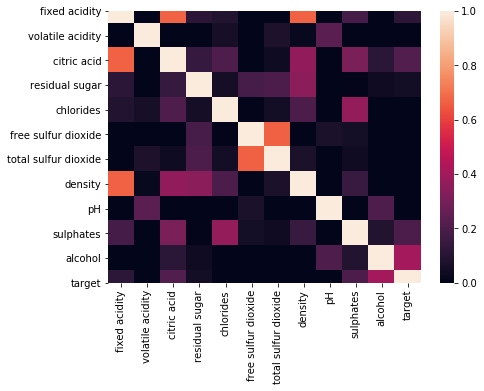

In [14]:
plt.figure(figsize=(7,5))
corr_matrix = df3.corr()
sns.heatmap(corr_matrix, vmin=0.0)
plt.show()

There are some strong correlationships.

 - citric acid x fixed acidity
 - density x fixed acidity
 - citric acid x density
 - density x residual sugar
 - sulphates x chlorides

## Model outcomes

Since our target is categorical value, We will explore:
    1. Naive Bayes
    2. Logistic Regression
    3. Decision tree
    4. Random forest
    5. SVC classifier
    6. K-nearest Neighbor
    
   __<font color=red>Logistic regression?</font>__

In [15]:
# Specify model inputs
X = df3.drop(columns=["target"])
y = df3['target']

# Verify shapes align
print(X.shape)
print(y.shape)

(1599, 11)
(1599,)


In [16]:
# Import train/test/split
from sklearn.model_selection import train_test_split

#Split data, set test size to 30%
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=20)

#examine shape of data sets
print("Training size:", X_train.shape, y_train.shape)
print("Test size:", X_test.shape, y_test.shape)

#Varify class balance in train/test sets
print(y_train.value_counts())
print(y_test.value_counts())

Training size: (1119, 11) (1119,)
Test size: (480, 11) (480,)
0    963
1    156
Name: target, dtype: int64
0    419
1     61
Name: target, dtype: int64


In [17]:
# Import some other performance metrics we'll use later on
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### Naive Bayes

In [18]:
from sklearn.naive_bayes import BernoulliNB

#Create instance
bnb = BernoulliNB()

#Fit training data
bnb.fit(X_train, y_train)

#Predict with training set
y_pred_train = bnb.predict(X_train)

#Predict with test set
y_pred_test = bnb.predict(X_test)

#Get accuracy scores, 
print("NB training accuracy score:", round(accuracy_score(y_pred_train, y_train),3))
print("NB test accuracy score:", round(accuracy_score(y_pred_test, y_test),3))

NB training accuracy score: 0.861
NB test accuracy score: 0.873


Training accuracy is 86.1%, test accuracy is 87.3%. The model performs decently.  <font color=red>__Is this overfitting??__</font>

In [24]:
#Confusion matrix training data
print("Confusion matrix training data: \n", confusion_matrix(y_train, y_pred_train), "\n")

# Classification metrics
print('Precision/Recall training data: \n', classification_report(y_train, y_pred_train))

Confusion matrix training data: 
 [[963   0]
 [156   0]] 

Precision/Recall training data: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       963
           1       0.00      0.00      0.00       156

    accuracy                           0.86      1119
   macro avg       0.43      0.50      0.46      1119
weighted avg       0.74      0.86      0.80      1119



From left to right, top to bottom, the confusion matrix gives the breakdown of true negatives (TN), false positives (FP), false negatives(FN), and true positives(TP).

<font color=red>__It seems like this model only answers negative.　This confirms that we're not great at identifying good wine__</font>



### Logistic Regression

In [48]:
#Import model
from sklearn.linear_model import LogisticRegression

#Instantiate and set regularization coefficient to large value
lr = LogisticRegression(C=1e10)

#Fit model
fit = lr.fit(X_train, y_train)

#Get results
print("Coefficient")
coef=fit.coef_
print(coef)
print(fit.intercept_)

#Predict with training set
y_pred_train = lr.predict(X_train)

#Predict with test set
y_pred_test = lr.predict(X_test)

print(pd.crosstab(y_pred_train, y_train), "\n")
print(pd.crosstab(y_pred_test, y_test))

print("Logistic regression training accuracy score:", round(lr.score(X_train, y_train), 3))
print("Logistic regression test accuracy score:", round(lr.score(X_test, y_test),3))

Coefficient
[[ 1.14017989e-01 -2.30044564e+00  4.75726444e-03  3.57757498e-02
  -1.38951231e+01  1.03086982e-02 -1.54077086e-02 -5.85338393e+00
  -7.71036527e-01  3.54988084e+00  9.95847401e-01]]
[-5.13208189]
target    0    1
row_0           
0       928  107
1        35   49 

target    0   1
row_0          
0       404  37
1        15  24
Logistic regression training accuracy score: 0.873
Logistic regression test accuracy score: 0.892


/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Decision tree